In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/classification_dataset.csv')

In [3]:
df.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,2.365398,-2.405070,1.454530,0.635454,0.331485,0.255484,0.141766,-1.884458,-1.619777,0.423212,0
1,1.466359,1.431838,2.492688,1.662741,0.845526,2.768129,1.151220,-1.278432,-0.076903,-0.721963,0
2,0.818121,-0.408409,-1.230546,1.709158,1.591019,1.030478,-0.205769,0.312407,2.566689,0.889988,0
3,0.173130,-2.019461,-0.303312,0.222706,0.531745,-0.340094,0.186762,-3.133564,2.682247,2.633538,0
4,-1.075339,1.231863,-1.169158,-1.186858,-0.715022,3.330301,-1.028577,1.840620,1.002101,-1.151868,1


In [4]:
df.shape

(500, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   500 non-null    float64
 1   feature_2   500 non-null    float64
 2   feature_3   500 non-null    float64
 3   feature_4   500 non-null    float64
 4   feature_5   500 non-null    float64
 5   feature_6   500 non-null    float64
 6   feature_7   500 non-null    float64
 7   feature_8   500 non-null    float64
 8   feature_9   500 non-null    float64
 9   feature_10  500 non-null    float64
 10  target      500 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 43.1 KB


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.513525,-0.448032,-0.272489,0.491160,-0.028041,0.444699,0.024600,-0.010832,0.516419,-0.003960,0.502000
std,1.739064,1.342242,1.642793,1.545646,1.015673,1.435665,0.959692,1.581349,1.523558,0.960248,0.500497
min,-4.976910,-4.172795,-4.885228,-4.875552,-2.722278,-3.051914,-2.899894,-5.468988,-4.011454,-3.324756,0.000000
25%,-0.591765,-1.365432,-1.453839,-0.523433,-0.728925,-0.561181,-0.610498,-1.109657,-0.563297,-0.687687,0.000000
50%,0.667046,-0.565533,-0.292420,0.610544,-0.034826,0.418715,-0.015203,0.068535,0.521520,-0.056873,1.000000
75%,1.749191,0.521343,0.884062,1.594637,0.620941,1.437785,0.679554,1.153484,1.568441,0.703336,1.000000
max,4.876240,3.378124,4.275262,4.443385,3.061947,4.260327,2.569907,4.351506,4.377880,2.633538,1.000000


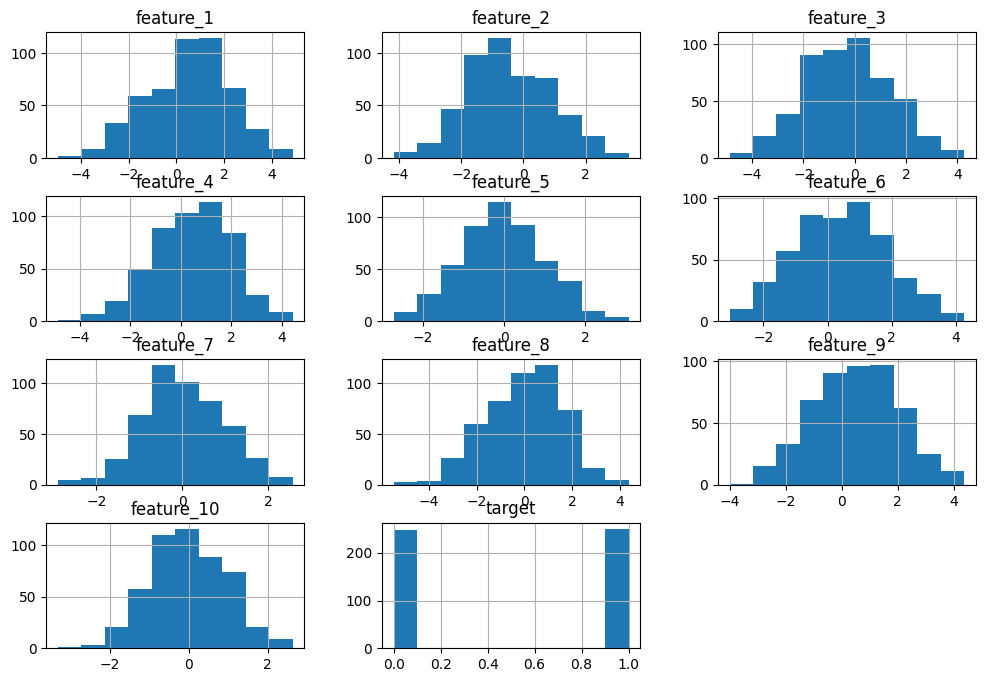

In [9]:
df.hist(figsize=(12,8))
plt.title('histogram plot')
plt.show()

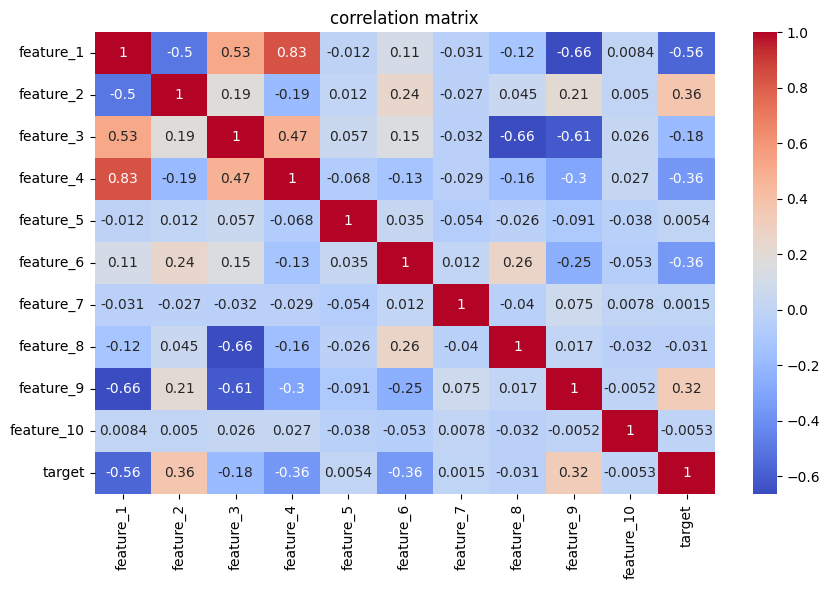

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [11]:
x = df.drop('target',axis = 1)
y = df['target']

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_lr)
print('accuracy of logistic regression', round(accuracy*100))

accuracy of logistic regression 71


In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

In [18]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('accuracy of decision tree', round(accuracy_dt*100))

accuracy of decision tree 65


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

In [20]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('accuracy of random forest', round(accuracy_rf*100))

accuracy of random forest 64


## results

- accuracy of logistic regression 71
- accuracy of decision tree 65
- accuracy of random forest 64


# Clustering

In [21]:
df_clustering = pd.read_csv('/content/clustering_dataset.csv')

In [22]:
df_clustering.head()

,feature_1,feature_2,feature_3,feature_4
0,0.485935,5.208400,-8.808069,9.279186
1,-1.480006,8.822360,4.617059,0.770134
2,2.147342,4.086340,-10.493068,9.061387
3,-6.304851,-6.479715,-7.593280,6.711503
4,3.281763,3.519169,-8.007437,9.635317


In [23]:
df_clustering.shape

(300, 4)

In [24]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  300 non-null    float64
 1   feature_2  300 non-null    float64
 2   feature_3  300 non-null    float64
 3   feature_4  300 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


In [25]:
df_clustering.describe()

,feature_1,feature_2,feature_3,feature_4
count,300.000000,300.000000,300.000000,300.000000
mean,-2.404813,2.115089,-4.541829,6.273579
std,3.968425,6.826672,6.607650,3.370803
min,-10.060791,-9.045968,-12.074592,-0.411913
25%,-6.291947,-6.049074,-9.562390,2.898031
50%,-2.528404,4.280647,-8.358478,7.256005
75%,1.495292,8.301778,3.784013,8.977385
max,5.054619,13.637564,7.267642,12.344557


In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

cluster = kmeans.fit_predict(df_clustering)

In [31]:
cluster_pca = pca.fit_transform(df_clustering)

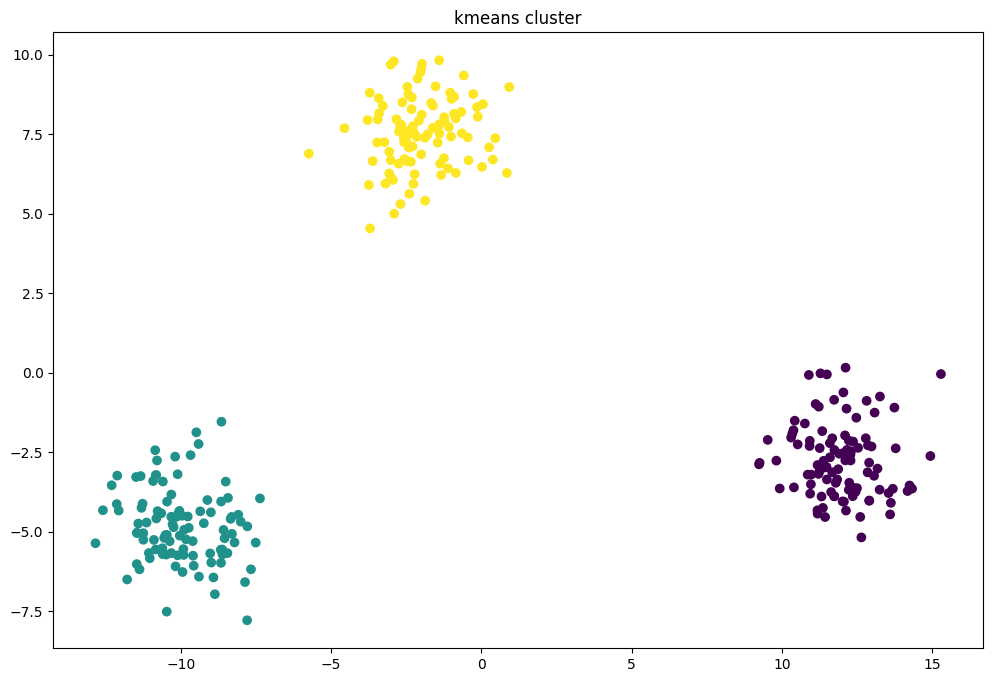

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(cluster_pca[:,0], cluster_pca[:,1], c=cluster)
plt.title('kmeans cluster')
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)

clusters_agg = agg.fit_predict(df_clustering)

In [34]:
agg_pca = pca.fit_transform(df_clustering)

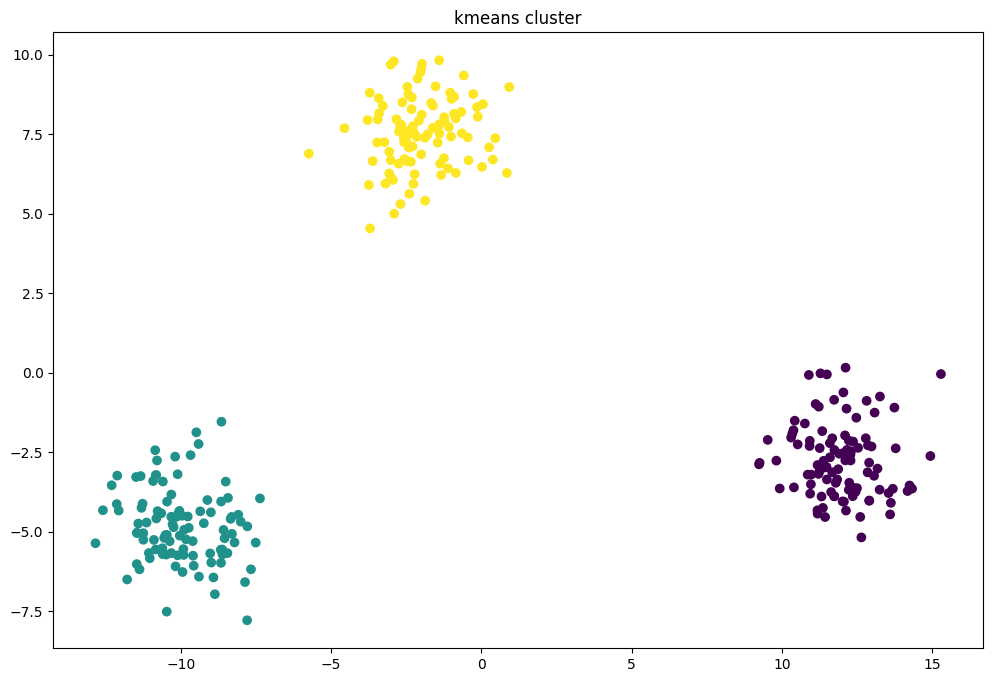

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(agg_pca[:,0], agg_pca[:,1], c=cluster)
plt.title('kmeans cluster')
plt.show()